In [28]:
import numpy as np
import pandas as pd

# Vectorization functions from SciKit-Learn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Tokenization functions from NLTK
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [2]:
# Only need to download once

#nltk.download("wordnet")
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shmel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

You can use command line to download data from internet, as long as the URL link is valid:

`!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv`

Note that file is already stored in repo folder.

# Exploratory data analysis

In [3]:
df = pd.read_csv('data/bbc_text_cls.csv')

In [4]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [5]:
# 2,225 rows and 2 columns 

df.shape

(2225, 2)

In [41]:
# Belongs to business category

df['text'][0]

'Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sig

In [6]:
inputs = df['text']

labels = df['labels']

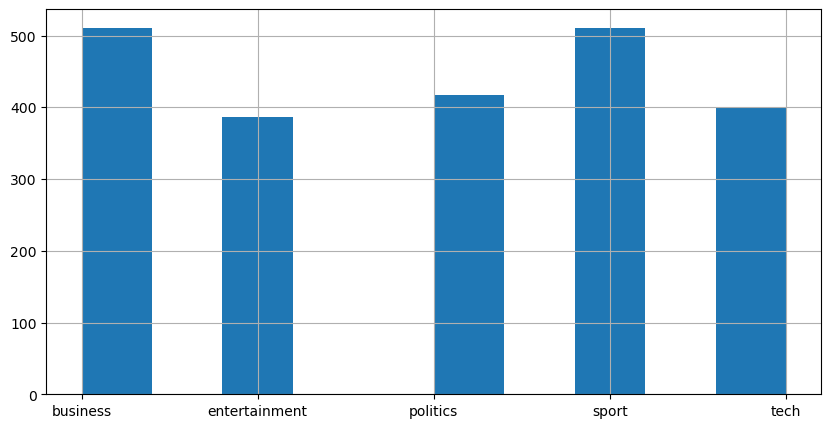

In [12]:
labels.hist(figsize=(10, 5));

In [13]:
# The text entries can belong to one of five categories - majority in business and sport but not too much variation
# Well-balanced dataset

In [45]:
df[df['labels'] == 'entertainment']['text'].loc[510]

'Gallery unveils interactive tree\n\nA Christmas tree that can receive text messages has been unveiled at London\'s Tate Britain art gallery.\n\nThe spruce has an antenna which can receive Bluetooth texts sent by visitors to the Tate. The messages will be "unwrapped" by sculptor Richard Wentworth, who is responsible for decorating the tree with broken plates and light bulbs. It is the 17th year that the gallery has invited an artist to dress their Christmas tree. Artists who have decorated the Tate tree in previous years include Tracey Emin in 2002.\n\nThe plain green Norway spruce is displayed in the gallery\'s foyer. Its light bulb adornments are dimmed, ordinary domestic ones joined together with string. The plates decorating the branches will be auctioned off for the children\'s charity ArtWorks. Wentworth worked as an assistant to sculptor Henry Moore in the late 1960s. His reputation as a sculptor grew in the 1980s, while he has been one of the most influential teachers during th

In [51]:
# Split input and label columns into training and test sets

input_train, input_test, Y_train, Y_test = train_test_split(inputs, labels, random_state=123)

In [52]:
# Instantiate vectorizer object

vectorizer = CountVectorizer()

In [53]:
# Train vectorizer with training set and vectorize training set
X_train = vectorizer.fit_transform(input_train)

# Vectorize test set
X_test = vectorizer.transform(input_test)

In [54]:
# Sparse matrix with 1,668 rows (no of text samples) and 26,287 columns (no of words)

X_train.shape

(1668, 26287)

In [55]:
X_train

<1668x26287 sparse matrix of type '<class 'numpy.int64'>'
	with 337411 stored elements in Compressed Sparse Row format>

In [58]:
# How much do all non-zero values in matrix add up to - matches number of stored elements, i.e. every value equals one
print("The sum of non-zero values:", (X_train != 0).sum())

The sum of non-zero values: 337411


In [57]:
# Number of non-zero values

print("The number of non-zero values:", X_train.nnz)

The number of non-zero values: 337411


In [59]:
# What percentage of values are non-zero? Approx. 0.8% of matrix is non-zero values
# Divide the sum of non-zero values by the product of rows-by-cols

(X_train != 0).sum() / np.prod(X_train.shape) * 100

0.7695239935415004

In [60]:
# Alternative using nnz method
sparsity = (100.0 * X_train.nnz / (X_train.shape[0] * X_train.shape[1]))

sparsity

0.7695239935415004

In [61]:
# Instantiate Multinomial probabilistic model
model = MultinomialNB()

# Train model with vectorized input
model.fit(X_train, Y_train)

# Print accuracy scores
print("Training score:", round(model.score(X_train, Y_train), 3))
print("Test score:", round(model.score(X_test, Y_test), 3))

Training score: 0.992
Test score: 0.971


In [ ]:
# Very good scores ~97% accuracy with 26,287 words

In [66]:
# Use custom function from lemmatization session to obtain correct part-of-speech tag

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J') or treebank_tag.startswith('I'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

You could create a Class object to tokenize and lemmatize words with correct part-of-speech tagging:

`class LemmaTokenizer:`
    
    def __init__(self):
        
        self.wnl = WordNetLemmatizer()
        
        def __call__(self, doc):
            
            tokens = word_tokenize(doc)
            
            words_and_tags = nltk.pos_tag(tokens)
            
            return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in words_and_tags]
            
            
Then call the Class object in the `tokenizer` argument of count vectorizer.

You can check whether Class object is callable:

`callable(LemmaTokenizer)`

In [92]:
# Function that uses part-of-speech tagging function to tokenize and lemmatize text sample

def lemmaTokenizer(doc):
    wnl = WordNetLemmatizer()
    tokens = word_tokenize(doc)
    words_and_tags = nltk.pos_tag(tokens)
    return [wnl.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in words_and_tags]

In [94]:
# Count vectorize text with function above and classify text using NB probabilities

vectorizer = CountVectorizer(tokenizer=lemmaTokenizer, analyzer='word')

X_train = vectorizer.fit_transform(input_train)
X_test = vectorizer.transform(input_test)

model = MultinomialNB()
model.fit(X_train, Y_train)

print("train score:", round(model.score(X_train, Y_train), 3))
print("test score:", round(model.score(X_test, Y_test), 3))

train score: 0.992
test score: 0.968


In [ ]:
X_train.shape

In [ ]:
# Interestingly, with lemmatization it is slightly worse, ~96.8% with words

You can create a Class object to stem the words instead of lemmatization:

`class StemTokenizer:`

    def __init__(self):
    
        self.porter = PorterStemmer()
        
        def __call__(self, doc):
        
            tokens = word_tokenize(doc)
            
            return [self.porter.stem(t) for t in tokens]
            
            
And call the Class object in tokenizer argument for the count vectorizer.

In [96]:
# Function to stem words in text sample per Porter rules

def stem_tokenizer(doc):
    porter = PorterStemmer()
    tokens = word_tokenize(doc)
    return [porter.stem(t) for t in tokens]

In [98]:
# Count vectorize text with stemming tokenizer and classify text using NB probabilities

vectorizer = CountVectorizer(tokenizer=stem_tokenizer, analyzer='word')

X_train = vectorizer.fit_transform(input_train)
X_test = vectorizer.transform(input_test)

model = MultinomialNB()
model.fit(X_train, Y_train)

print("Training score:", round(model.score(X_train, Y_train), 3))
print("Test score:", round(model.score(X_test, Y_test), 3))

Training score: 0.989
Test score: 0.969


In [ ]:
X_train.shape

In [ ]:
# Results about the same as with lemmatization, ~96.9% accuracy with words

In [85]:
# Lets try without any stemming or lemmatization at all, i.e. simple splitting method

def simple_tokenizer(s):
    return s.split()

In [91]:
# Count vectorize with basic splitting method and classify text using NB probabilities
vectorizer = CountVectorizer(tokenizer=simple_tokenizer, analyzer='word')

X_train = vectorizer.fit_transform(input_train)
X_test = vectorizer.transform(input_test)

model = MultinomialNB()
model.fit(X_train, Y_train)

print("train score:", round(model.score(X_train, Y_train), 3))
print("test score:", round(model.score(X_test, Y_test), 3))

train score: 0.995
test score: 0.971


In [ ]:
# The results are the same as using the default tokenizer, if not slightly better.

# What is the vector dimensionality in each case?
# Compare them and consider why they are larger / smaller


In [99]:
# 22,828 words - less than the number of tokens from default tokenizer, which explains higher score

X_train.shape

(1668, 22828)

**The training set that yielded the greatest number of words, i.e. largest vocabulary, was by using process.**

**The training set that yielded the least number of words, i.e. smallest vocabulary, was by using process.**

According the probability results, the best method of tokenization is to use the simple string-splitting tokenizer, but this is only relevant for a single model instance. More testing is required.

It is worth noting that lemmatization tokenization took the longest to compute.
